<a href="https://colab.research.google.com/github/shahin1009/SVD/blob/main/ImageDecomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression using SVD

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import numpy as np
from PIL import Image

In [ ]:
# Run this cell to load the image.
!wget https://github.com/shahin1009/SVD/raw/main/Ito.jpg

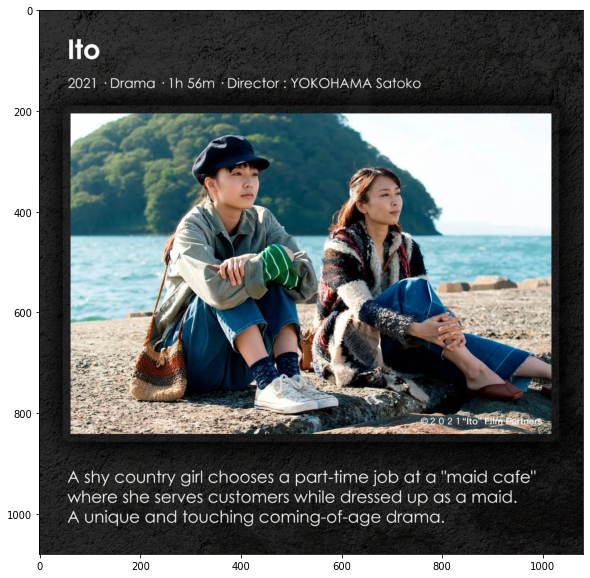

In [2]:
img = Image.open('Ito.jpg')
plt.imshow(img)

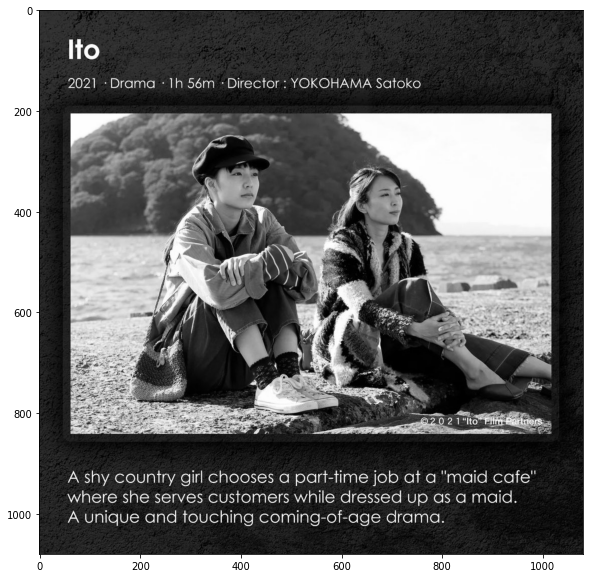

In [3]:
imggray = img.convert('LA') # grayscale
plt.imshow(imggray) 

from: <class 'numpy.ndarray'>
to: <class 'numpy.matrix'>
pixels: (1080, 1080)


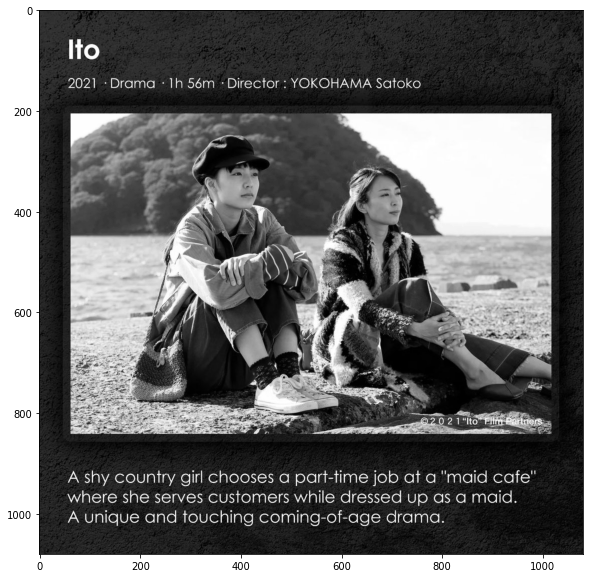

In [5]:
imgmat = np.array(list(imggray.getdata(band=0)), float) #convert to numpy array
imgmat = imgmat.reshape(imggray.size[1], imggray.size[0]) #reshape from 1D to 2D array

print(f"from: {type(imgmat)}")
imgmat = np.matrix(imgmat) #convert to matrix
print(f"to: {type(imgmat)}")

print(f"pixels: {imgmat.shape}")
plt.imshow(imgmat, cmap='gray') #show image

## Formulation of Singular value decomposition

A is a $m \times n$ matrix</br>
$A = U \Sigma V$   
$U = \begin{bmatrix} \\ \\ \\ \vec{u}_1 & \vec{u}_2 & \dots & \vec{u}_m \\ \\ \\ \end{bmatrix}$

$\Sigma = \begin{bmatrix} \sigma_1 & 0 & \dots \\ 0 &  \sigma_2 & \dots \\ \vdots & \vdots & \ddots \end{bmatrix}$
where $\sigma_1 > \sigma_2 > \sigma_3 > ...$

$V = \begin{bmatrix} \\ \\ \\ \vec{v}_1 & \vec{v}_2 & \dots & \vec{v}_n \\ \\ \\ \end{bmatrix}$

The SVD truncation results in a compression of the original image, since only the first 100 columns of U and V, along with the first 100 diagonal elements of Σ must be stored


In [7]:
U, sigma, V = np.linalg.svd(imgmat) #singular value decomposition

In [8]:
U.shape, V.shape, sigma.shape

((1080, 1080), (1080, 1080), (1080,))

reconstimg pixels: (1080, 1080)


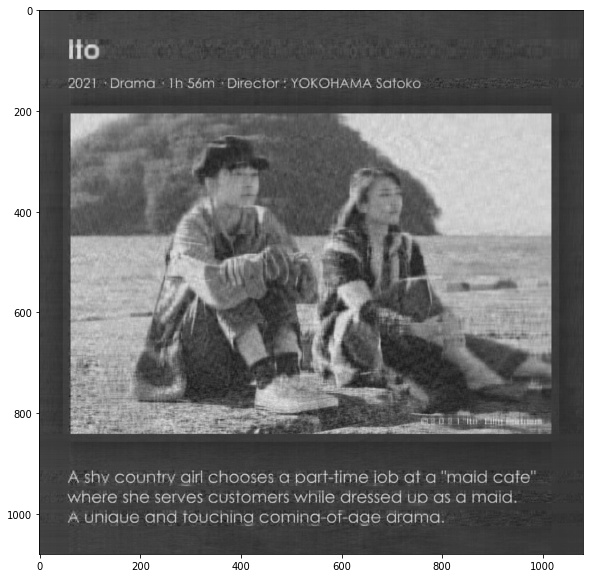

In [9]:
n = 60 #number of components
reconstimg = np.matrix(U[:, :n]) * np.diag(sigma[:n]) * np.matrix(V[:n, :]) #reconstruct image from the n first singular values
print(f"reconstimg pixels: {reconstimg.shape}")

plt.imshow(reconstimg , cmap='gray') #show image

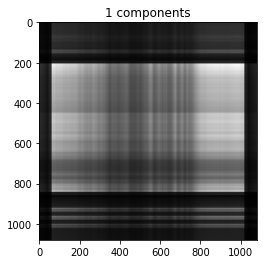

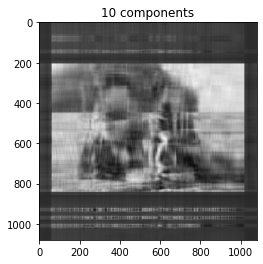

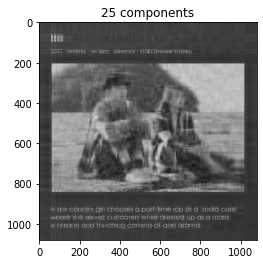

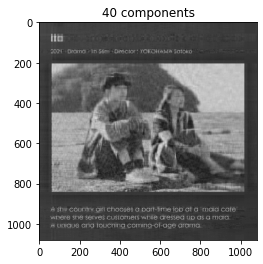

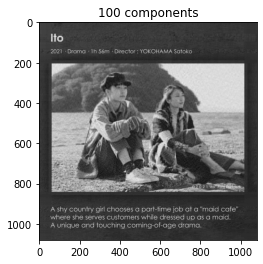

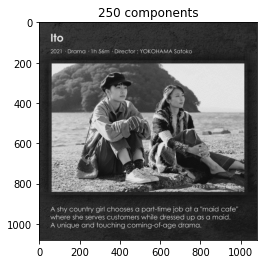

In [11]:
for i in np.array([1,10,25,40,100,250]): #show first i singular values
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :]) #reconstruct image from i first singular values
    fig = plt.figure(figsize=(4,4)) #figure size
    plt.imshow(reconstimg , cmap='gray') #show image
    plt.title(f"{i} components") #title

## Plotting the singular values and cumulative energy

Text(0.5, 0, 'Components')

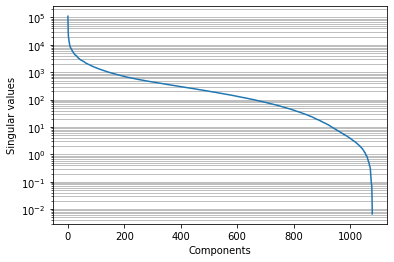

In [25]:
fig = plt.figure(figsize=(6,4)) #figure size
plt.semilogy(sigma) #plot singular values(sigma) in log scale
plt.grid(axis='y' , which='both') #grid
plt.ylabel('Singular values') #ylabel
plt.xlabel('Components') #xlabel

Text(0.5, 0, 'Components')

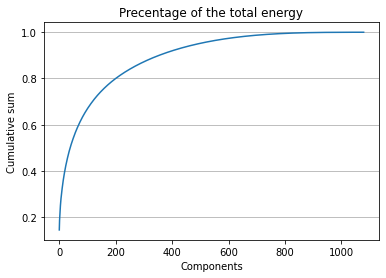

In [26]:
fig = plt.figure(figsize=(6,4)) #figure size
plt.plot(np.cumsum(sigma)/np.sum(sigma)) #plot cumulative sum of singular values
plt.grid(axis='y' , which='both') #grid
plt.title("Precentage of the total energy") #title
plt.ylabel('Cumulative sum') #ylabel
plt.xlabel('Components') #xlabel